<a href="https://colab.research.google.com/github/Manish-k723/United-Airlines/blob/main/Customer_comment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/united.zip','r') as zip_ref:
  zip_ref.extractall('/content')

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}
sns.set(rc = rc)

palette_color = sns.color_palette('dark')
palette1 = ['dimgrey','crimson']
palette2 = ['crimson', 'dimgrey']
palette3 = ['darkgreen', 'orange']
palette4 = ['salmon','mediumseagreen']
palette5 = ['mediumseagreen','salmon']
palette6 = sns.color_palette("YlOrBr")

In [4]:
df = pd.read_csv("/content/Datasets/Survey data _Customer comments.csv", parse_dates = ['scheduled_departure_date'])

In [5]:
df.shape

(9424, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   flight_number             9424 non-null   int64         
 1   origin_station_code       9424 non-null   object        
 2   destination_station_code  9424 non-null   object        
 3   scheduled_departure_date  9424 non-null   datetime64[ns]
 4   arrival_delay_group       9424 non-null   object        
 5   departure_delay_group     9424 non-null   object        
 6   entity                    9424 non-null   object        
 7   verbatim_text             9424 non-null   object        
 8   seat_factor_band          9424 non-null   object        
 9   ques_verbatim_text        9424 non-null   object        
 10  loyalty_program_level     6920 non-null   object        
 11  fleet_type_description    9424 non-null   object        
 12  fleet_usage         

In [7]:
df.isna().sum()

flight_number                  0
origin_station_code            0
destination_station_code       0
scheduled_departure_date       0
arrival_delay_group            0
departure_delay_group          0
entity                         0
verbatim_text                  0
seat_factor_band               0
ques_verbatim_text             0
loyalty_program_level       2504
fleet_type_description         0
fleet_usage                    0
response_group                 0
dtype: int64

In [8]:
df.sample(5)

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group
3099,16,LHX,EWX,2022-09-14,Delayed,Early & Ontime,Atlantic,I struggled with both vegetarian meals on this...,0 to 70,Is there anything else you'd like to share abo...,premier 1k,B767-300,Mainline,member
3999,4972,JAX,IAX,2022-09-17,Early & Ontime,Delayed,Domestic,N/A.,90+,Is there anything else you'd like to share abo...,NaN,ERJ-145,Express,non-member
7583,1660,ATX,ORX,2022-09-09,Early & Ontime,Delayed,Domestic,I did not get a snack. nothing was offered.,90+,Is there anything else you'd like to share abo...,non-elite,A319-100,Mainline,member
8063,523,SFX,JFX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Wish they could have more diet drinks without ...,90+,Is there anything else you'd like to share abo...,NaN,B757-200,Mainline,non-member
6041,2030,MSX,ORX,2022-09-27,Early & Ontime,Early & Ontime,Domestic,"On time , no issues.",90+,Is there anything else you'd like to share abo...,premier silver,B737-800,Mainline,member


In [9]:
!pip install transformers --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.8 MB/s eta 0:00:00


In [10]:
from transformers import BertTokenizer, TFBertForSequenceClassification

model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
import tensorflow as tf

In [27]:
%%time
# Example text for sentiment prediction
text = "The movie was great"

# Tokenize and predict sentiment
input_ids = tokenizer.encode(text, padding=True, truncation=True, return_tensors="tf")
predictions = model.predict(input_ids)

# Get the predicted sentiment label (0 for negative, 1 for positive, etc.)
predicted_label = tf.argmax(predictions.logits, axis=1).numpy()[0]
predicted_label

1/1 [==============================] - 0s 139ms/step
CPU times: user 207 ms, sys: 4.43 ms, total: 211 ms
Wall time: 226 ms


1

In [28]:
sentiments = []
for text in df['verbatim_text']:
    # print(text[0])
    input_ids = tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=128, padding=True, return_tensors="tf")

    # Make predictions
    logits = model(input_ids)[0]

    # Convert logits to probabilities and get the predicted sentiment label
    probs = tf.nn.softmax(logits, axis=1)
    predicted_class = tf.argmax(probs, axis=1).numpy()[0]

    # Interpret the predicted_class based on your sentiment label mapping
    sentiment_mapping = {0: "Negative", 1: "Positive"}
    predicted_sentiment = sentiment_mapping[predicted_class]

    # Append the predicted sentiment to the list
    sentiments.append(predicted_sentiment)

df['sentiments'] = sentiments

In [29]:
df['sentiments'].value_counts()

Positive    9420
Negative       4
Name: sentiments, dtype: int64

# **Data PreProcessing**
Now, going to preprocess the data for making a word cloud of the comments.

What thinks to do in it:

1. Convert to lower case
2. Tokenization
3. Removing special characters
4. Removing punctuation and stop words.
5. Stemming - Convert similar words into one word.

In [ ]:
import nltk
import string
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download ('stopwords')
stopwords.words('english')

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def text_transform(text):
  y = []
  text = text.lower() # 1st step
  text = nltk.word_tokenize(text) # 2nd step
  for i in text:# 3 step
      if i.isalnum():
        y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  text = y[:]
  return " ".join(text)

In [ ]:
df['transformed_text'] = df['verbatim_text'].apply(text_transform)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white',collocations = False)

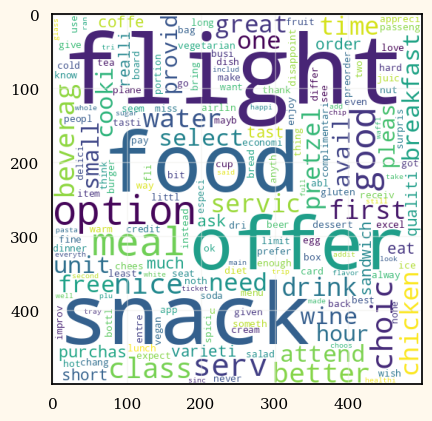

In [ ]:
cloud = wc.generate(df['transformed_text'].str.cat(sep = ' '))
plt.imshow(cloud)

In [ ]:
df.to_csv("Customer_comment.csv")

In [ ]:
df['loyalty_program_level'].fillna('NotaMember', inplace = True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'non-elite'),
  Text(1, 0, 'NotaMember'),
  Text(2, 0, 'premier gold'),
  Text(3, 0, 'premier 1k'),
  Text(4, 0, 'premier silver'),
  Text(5, 0, 'global services'),
  Text(6, 0, 'premier platinum'),
  Text(7, 0, 'NBK')])

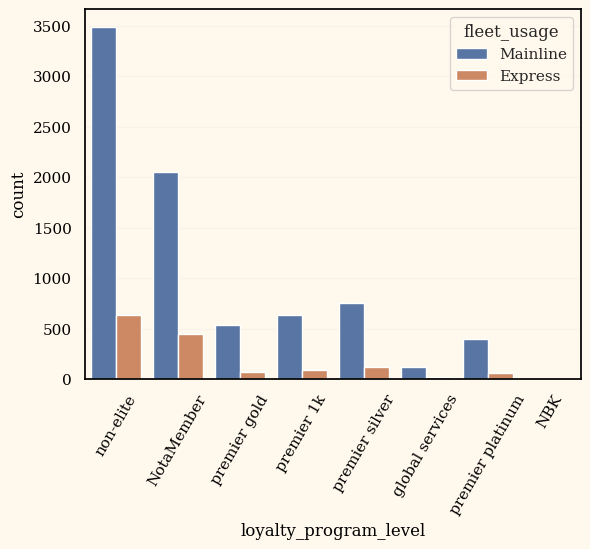

In [ ]:
sns.countplot(data = df, x = 'loyalty_program_level', hue = 'fleet_usage')
plt.xticks(rotation = 60)